In [2]:
#primero importamos las librerias que vamos a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#esta linea permite que los graficos sean renderizados directamente en nuestro notebook
%matplotlib inline

In [4]:
#este comando read a demas de traer el archivo csv tiene una serie de funcionalidades extras que permite transformar estos datos (estudiarlo mas a fondo)
pd.read_csv


<function pandas.io.parsers._make_parser_function.<locals>.parser_f(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [5]:
#cargamos nuestro archivo csv con los datos que requerimos dando el path apropiado y en este caso con una codificacion utf8
peliculas = pd.read_csv('peliculas.csv', encoding='utf-8')

In [6]:
type(peliculas)# para saber que tipo es

pandas.core.frame.DataFrame

In [7]:
peliculas.head()# te muestra los primeros elementos de los datos que contiene el objeto

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [8]:
peliculas.shape # te la dimensionalidad del objeto

(5043, 19)

In [9]:
peliculas.columns #para saber q columnas tiene

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [10]:
peliculas.index #cuantos datos tengo 

RangeIndex(start=0, stop=5043, step=1)

In [11]:
#si quiero sacar todos los datos de una sola columna puedo poner su index de la sig forma
columna = peliculas['movie_title']
columna.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [12]:
fila = peliculas.loc[10,:] #estamos pidiendo todos los elementos de la fila 10
fila

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [13]:
peliculas.info() # esto te da la informacion que hay sobre las columnas la cantidad de datos no nulos y su tipo 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

In [14]:
#si solo quiero los tipos de las columnas uso
peliculas.dtypes
#este objeto vendria a ser una lista de columnas

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

In [15]:
# si yo comparo esta lista de columnas CON ALGUN TIPO, me trae una lista de booleans con la comparacion
#esta que me dice si el tipo de la columna coincide con el que yo pregunto
peliculas.dtypes == float #todo eso haciendo un ciclo sin tener q explicitarlo

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [16]:
#puedo aplicar comparaciones booleanas para esta misma operacion de la siguiente manera
(peliculas.dtypes == float) | (peliculas.dtypes == int) #siempre recordando los parentecis 
#y asi comparando se es de un tipo U otro me va creando nuevamente el loop hasta hacer la comparacion con todos los elementos

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [17]:
#ahora q sabemos cuales son los tipos vaos a separar los datos 
#creamos una variable q contendra una lista de booleanos q compara cuales son las columnas que conmplen con la condicion
colum = (peliculas.dtypes == float) | (peliculas.dtypes == int)
#entonces creamos una variable que contendra ahora una lista de columnas que cumplen la condicion 
#que en este caso era si eran columnas de tipo flotantes o enteros
num =[c for c in colum.index if colum[c]] # NOTA MENTAL NO CONFUNDIR PARENTESIS 
#[c for c in ... es un parentecis de [ porque es una lista lo que va a guardar
num
#asi conseguimos una lista de columnas del tipo float e int ("numeros por decir algo")

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'budget',
 'imdb_score',
 'gross']

In [18]:
#repetimos ahora con las columnas tipo object que es la forma que tenemos aqui de nombrar los varchar, char, ETC
colum = (peliculas.dtypes == object)
obj =[c for c in colum.index if colum[c]]
obj
#asi conseguimos una lista de columnas que sean del tipo object

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [19]:
#ya que tenemos separdas las columnas de un tipo procederemos a revisar las estadisticas de estos datos
#asi nos aseguramos de las "salud" de nuestros datos
#NOTA: casi siempre van a venir con algunos errores humanos comunes como cambio de moneda tipos de medida y otros


#NOTA: no confundirse, porque antes traiamos las columnas que cumplian un criterio
#ahora traemos las filas de datos de esas columnas que cumplen esa misma condicional 

#esto traera los datos de las columnas que son solo numericas(int y float)
peliculas[num]
#crea un ciclo donde va comparando las columnas de nuestros datos con la lista de booleanos que cumplen esta condicion 
#y trae sus datos

#asgnamos esto a una variable
pelis_num = peliculas[num]
pelis_num

,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,NaN,7.1,NaN
5,2012.0,2.35,132.0,132.0,263700000.0,6.6,73058679.0
6,2007.0,2.35,156.0,156.0,258000000.0,6.2,336530303.0
7,2010.0,1.85,100.0,100.0,260000000.0,7.8,200807262.0
8,2015.0,2.35,141.0,141.0,250000000.0,7.5,458991599.0
9,2009.0,2.35,153.0,153.0,250000000.0,7.5,301956980.0


In [20]:
pelis_num.describe() # nos muestra las estadisticas de las columnas numericas 

,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,1.221550e+10,9.500000,7.605058e+08


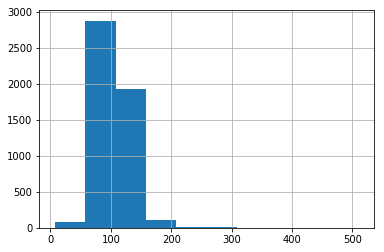

In [21]:
#ahora revisaremos las...
pelis_num['duration'].hist()

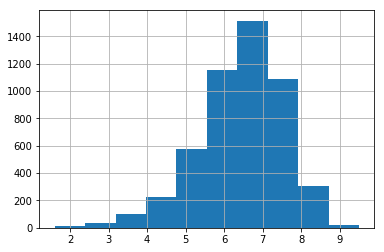

In [22]:
pelis_num['imdb_score'].hist()

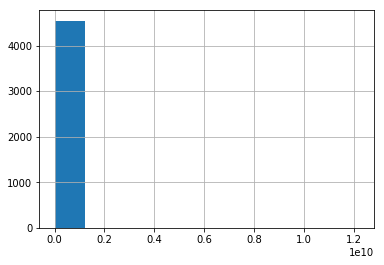

In [23]:
pelis_num['budget'].hist()

In [24]:
#claramente aqui hay un error de algun tipo 
#el grafico muestra las estadisticas de los valores en millones de dolares para cada pelicula
#entre 0 y 1000 peliculas sobre tanta cantidad entre 1000 y 2000 pelis entre otro numero 
#y vemos q hay un numero casi despreciable de peliculas q tienen un valor exageradamente alto mas alla del limite general
#para esto revisaremos cuantos son exactamente los valores que exceden este limite de la siguiente forma

(pelis_num['budget'] > 1e9).value_counts() #aqui decimos dema una lista de boolean comparando si el valor cumple con la condicion o no
#luego cuentalos y dime cuantos cumplen con esto y cuantos no

False    5037
True        6
Name: budget, dtype: int64

In [25]:
#aqui dice q solo 6 datos estan sobre estas graficas lo cual es muy raro que pase
#vamos a guardar esto en una variable y vamos a extraer los datos completos de las filas con este problema
filtro = (pelis_num['budget'] > 1e9)
peliculas[filtro] #filtro al ser una lista de true o false hace que cuando sea true traiga justamente estos

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [26]:
#observamos que todas las peliculas con este problema son de origen asiatico o similar
#por lo que probablemente estas monedas no han sido debidamente transformadas al sistema de medida que estamos usando de dolares
